<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Proyecto/blob/main/ProyectoSLII_FFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statistical Learning II**

**Sección U**

**Proyecto - Feed Forward Network**

## Importando librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Importando dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Statistical Learning II/Proyecto/Datasets/SouthAfricaHeartDisease.csv')

In [3]:
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Analisis del dataset a utilizar

In [4]:
df = df.drop(columns=['row.names'])
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Se tiene que el dataset contiene la siguiente información:
- **sbp**: presión arterial sistólica
- **tabaco**: tabaco acumulativo (kg)
- **ldl**: colesterol unido a lipoproteínas de baja densidad adiposidad
- **famhist**: antecedentes familiares de enfermedad cardíaca (presente, ausente)
- **typea**: comportamiento tipo A
- **obesidad**: factor de obesidad
- **alcohol**: consumo actual de alcohol
- **edad**: edad de inicio
- **chd**: respuesta, enfermedad coronaria (enfermedad relacionada con el corazón)

In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [225]:
df.age.value_counts()

16    20
58    17
17    17
61    16
59    16
55    16
60    15
49    14
53    14
45    14
64    13
38    13
42    13
48    13
40    12
62    12
32    11
46    11
27    11
52    10
54    10
41    10
39    10
33     9
56     9
31     9
57     8
18     8
51     8
50     8
44     8
63     8
43     8
30     7
29     7
28     7
34     6
20     6
37     6
24     6
26     5
25     4
21     3
36     3
47     3
15     3
23     2
19     2
35     1
Name: age, dtype: int64

In [226]:
df.famhist.describe()

count        462
unique         2
top       Absent
freq         270
Name: famhist, dtype: object

In [227]:
df.famhist.unique()

array(['Present', 'Absent'], dtype=object)

In [6]:
df['famhist'] = np.where(df['famhist']=='Present', 1, 0)

In [54]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [229]:
df.famhist.describe()

count    462.000000
mean       0.415584
std        0.493357
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: famhist, dtype: float64

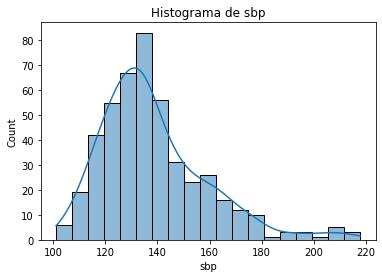

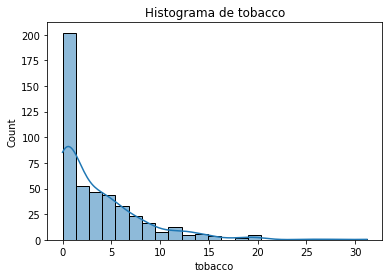

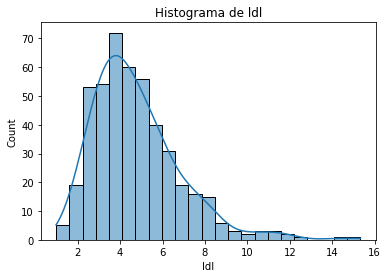

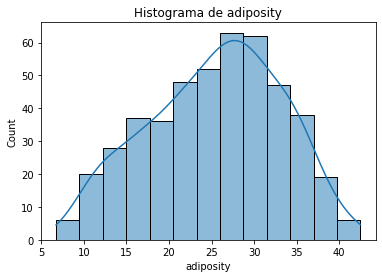

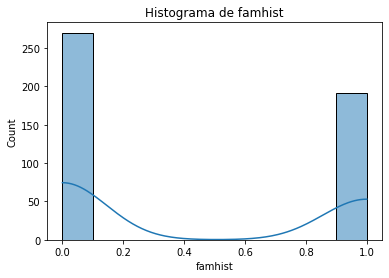

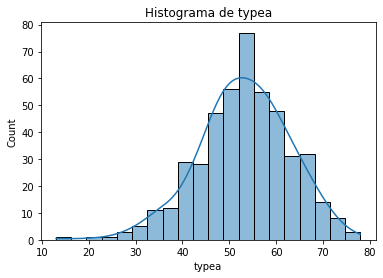

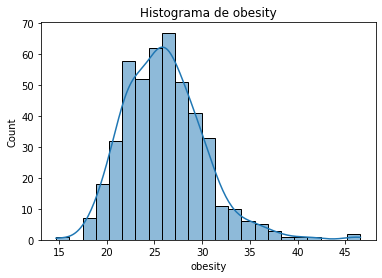

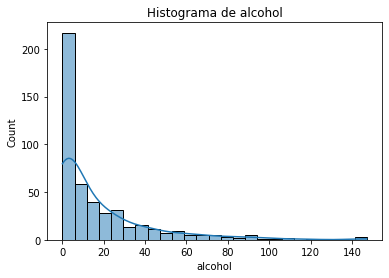

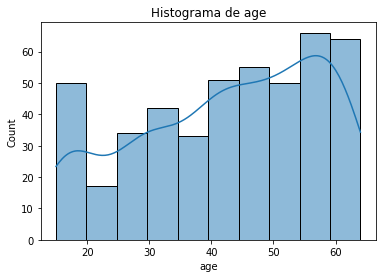

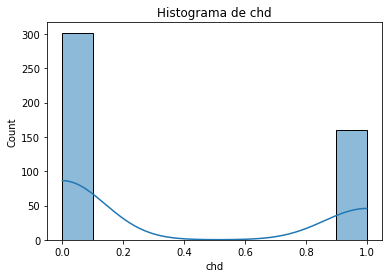

In [230]:
for x in df.columns:
    plt.figure()
    # Se utiliza histplot en lugar de la función distplot debido a que ya esta marcada como deprecated
    if df[x].dtypes != 'object':
      sns.histplot(df[x],  kde=True).set_title("Histograma de "+ x)

In [7]:
y = np.array(df.iloc[:, -1])
x = np.array(df.iloc[:, :-1])

In [8]:
class_1 = df[df.iloc[:,-1]==1]
class_0 = df[df.iloc[:,-1]==0]

In [233]:
class_1.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,143.737500,5.524875,5.487938,28.120250,0.600000,54.493750,26.622937,19.145250,50.293750,1.0
std,23.677468,5.565143,2.225073,7.057996,0.491436,10.246642,4.391323,26.181102,10.649119,0.0
min,102.000000,0.000000,1.550000,9.390000,0.000000,20.000000,14.700000,0.000000,17.000000,1.0
25%,127.500000,1.500000,3.940000,23.462500,0.000000,47.750000,23.635000,0.475000,42.750000,1.0
50%,138.000000,4.130000,5.065000,28.405000,1.000000,55.000000,26.475000,8.330000,53.000000,1.0
75%,158.500000,8.200000,6.582500,33.587500,1.000000,61.000000,28.780000,24.582500,59.000000,1.0
max,218.000000,31.200000,14.160000,42.490000,1.000000,78.000000,45.720000,147.190000,64.000000,1.0


In [9]:
class_1 = np.array(pd.DataFrame(class_1).sample(n =  160, replace = True))
class_0 = np.array(pd.DataFrame(class_0).sample(n =  160, replace = True))

In [10]:
balanced_df = np.concatenate((class_1, class_0), axis=0)

In [11]:
y = np.array(balanced_df[:, -1])
x = np.array(balanced_df[:, :-1])

## Separación datos de entrenamiento y validación

In [12]:
X_train, X_validate, y_train_cat, y_validate_cat = train_test_split(x, y, test_size=0.15)

In [238]:
X_train.shape

(272, 9)

In [239]:
y_train_cat.shape

(272,)

In [240]:
y_validate_cat.shape

(48,)

In [241]:
def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Experimentos

In [242]:
name = 'Experimento_1'
model = Sequential(name=name)
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [243]:
model.summary()

Model: "Experimento_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_97 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 10        
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [244]:
file_name = name+'.h5'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mc = ModelCheckpoint(file_name, monitor='val_accuracy', mode='max', verbose=1, patience=1000, save_best_only=True)

In [245]:
history_e1 = model.fit(
                        X_train, 
                        y_train_cat, 
                        epochs=500, 
                        batch_size=10,
                        validation_data=(X_validate, y_validate_cat),
                        callbacks = [mc]
                       )

Epoch 1/500
28/28 [==============================] - 1s 8ms/step - loss: 14.8899 - accuracy: 0.4926 - val_loss: 8.1672 - val_accuracy: 0.5417

Epoch 00001: val_accuracy improved from -inf to 0.54167, saving model to Experimento_1.h5
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 4.7393 - accuracy: 0.4779 - val_loss: 1.8354 - val_accuracy: 0.4167

Epoch 00002: val_accuracy did not improve from 0.54167
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 1.8326 - accuracy: 0.4118 - val_loss: 1.5785 - val_accuracy: 0.4167

Epoch 00003: val_accuracy did not improve from 0.54167
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 1.5172 - accuracy: 0.4559 - val_loss: 1.2853 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.54167
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 1.2847 - accuracy: 0.4853 - val_loss: 1.1223 - val_accuracy: 0.5208

Epoch 00005: val_accuracy did not 

In [246]:
def evaluar_modelo(modelo, X_train, y_train, X_validate, y_validate, batch_size):
  model = load_model(modelo)
  loss_trn, accuracy_trn = model.evaluate(X_train, y_train, batch_size=batch_size)
  loss_tst, accuracy_tst = model.evaluate(X_validate, y_validate, batch_size=batch_size)
  print("=====================")
  print("\nModelo: "+ modelo)
  print("\nTrain accuracy: %.1f%%" % (100.0 * accuracy_trn))
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy_tst))
  print("\n=====================")

In [247]:
evaluar_modelo(file_name, X_train, y_train_cat, X_validate, y_validate_cat, 10)

5/5 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7708

Modelo: Experimento_1.h5

Train accuracy: 69.9%

Test accuracy: 77.1%



In [248]:
name = 'Experimento_2'
model = Sequential(name=name)
model.add(Dense(64, activation = "relu", input_dim=9))
model.add(BatchNormalization())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation = "sigmoid"))

In [249]:
model.summary()

Model: "Experimento_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 64)                640       
_________________________________________________________________
batch_normalization_32 (Batc (None, 64)                256       
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_30 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 33        
Total params: 3,009
Trainable params: 2,881
Non-trainable params: 128
_________________________________________________________________


In [250]:
file_name = name+'.h5'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mc = ModelCheckpoint(file_name, monitor='val_accuracy', mode='max', verbose=1, patience=1000, save_best_only=True)

In [251]:
history_e2 = model.fit(
                        X_train, 
                        y_train_cat, 
                        epochs=2000, 
                        batch_size=10,
                        validation_data=(X_validate, y_validate_cat),
                        callbacks = [mc]
                       )

Streaming output truncated to the last 5000 lines.
Epoch 751/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8272 - val_loss: 0.4367 - val_accuracy: 0.8542

Epoch 00751: val_accuracy did not improve from 0.87500
Epoch 752/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8419 - val_loss: 0.5007 - val_accuracy: 0.7917

Epoch 00752: val_accuracy did not improve from 0.87500
Epoch 753/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.3650 - accuracy: 0.8493 - val_loss: 0.5166 - val_accuracy: 0.7917

Epoch 00753: val_accuracy did not improve from 0.87500
Epoch 754/2000
28/28 [==============================] - 0s 6ms/step - loss: 0.4074 - accuracy: 0.8235 - val_loss: 0.5969 - val_accuracy: 0.7917

Epoch 00754: val_accuracy did not improve from 0.87500
Epoch 755/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.8051 - val_loss: 0.5371 - val_accuracy: 0.7917

Epoc

In [252]:
evaluar_modelo(file_name, X_train, y_train_cat, X_validate, y_validate_cat, 32)

2/2 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.9167

Modelo: Experimento_2.h5

Train accuracy: 93.0%

Test accuracy: 91.7%



In [253]:
name = 'Experimento_3'
model = Sequential(name=name)
model.add(Dense(16, activation = "relu", input_dim=9))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.45))
model.add(Dense(2, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation = "sigmoid"))

In [254]:
model.summary()

Model: "Experimento_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 16)                160       
_________________________________________________________________
batch_normalization_33 (Batc (None, 16)                64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_32 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 18        
_________________________________________________________________
batch_normalization_34 (Batc (None, 2)               

In [255]:
file_name = name+'.h5'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mc = ModelCheckpoint(file_name, monitor='val_accuracy', mode='max', verbose=1, patience=1000, save_best_only=True)

In [256]:
history_e3 = model.fit(
                        X_train, 
                        y_train_cat, 
                        epochs=2000, 
                        batch_size=20,
                        validation_data=(X_validate, y_validate_cat),
                        callbacks = [mc]
                       )

Streaming output truncated to the last 5000 lines.
Epoch 751/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.6544 - val_loss: 0.5521 - val_accuracy: 0.7292

Epoch 00751: val_accuracy did not improve from 0.79167
Epoch 752/2000
14/14 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.6875 - val_loss: 0.5540 - val_accuracy: 0.7083

Epoch 00752: val_accuracy did not improve from 0.79167
Epoch 753/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.6250 - val_loss: 0.5545 - val_accuracy: 0.7292

Epoch 00753: val_accuracy did not improve from 0.79167
Epoch 754/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.6200 - accuracy: 0.6801 - val_loss: 0.5560 - val_accuracy: 0.6875

Epoch 00754: val_accuracy did not improve from 0.79167
Epoch 755/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6875 - val_loss: 0.5603 - val_accuracy: 0.6667

Epoc

In [257]:
evaluar_modelo(file_name, X_train, y_train_cat, X_validate, y_validate_cat, 32)

2/2 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7917

Modelo: Experimento_3.h5

Train accuracy: 68.0%

Test accuracy: 79.2%



## Análisis de resultados

In [258]:
def plot_loss_accuracy(history, name=''):
  plt.figure(figsize=(12, 8))
  plt.subplot(2, 2, 1)
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='val_Loss')
  plt.legend()
  plt.title('Loss evolution {}'.format(name))

  plt.subplot(2, 2, 2)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.title('Accuracy evolution {}'.format(name))

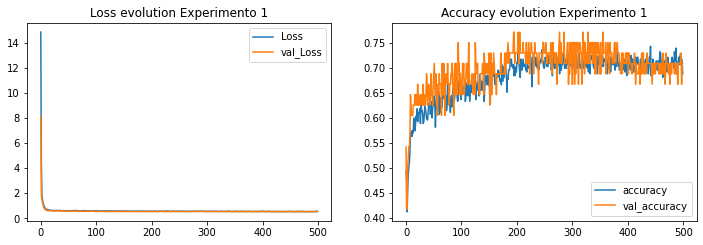

In [259]:
plot_loss_accuracy(history_e1, name='Experimento 1')

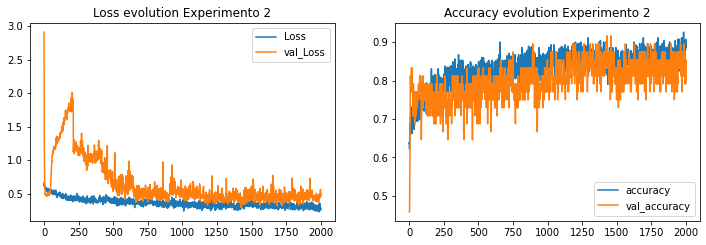

In [260]:
plot_loss_accuracy(history_e2, name='Experimento 2')

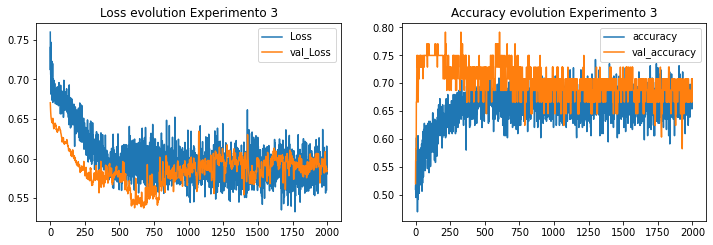

In [261]:
plot_loss_accuracy(history_e3, name='Experimento 3')

In [13]:
best_model = load_model('Experimento_2.h5')

In [37]:
best_model.predict(X_validate[:5])

array([[0.03308402],
       [0.26446262],
       [0.99807346],
       [0.00370344],
       [0.9958254 ]])

In [38]:
y_validate_cat[:5]

array([0., 0., 1., 0., 1.])

In [53]:
pred = best_model.predict(X_validate, batch_size=32, verbose=1)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
pred = list(pred.astype(int))
report = classification_report(y_validate_cat, pred)
print(report)

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78        28
         1.0       0.68      0.85      0.76        20

    accuracy                           0.77        48
   macro avg       0.77      0.78      0.77        48
weighted avg       0.79      0.77      0.77        48



## Conclusiones

- Se obtiene que el mejor modelo es el del experimento 2
- El experimento 2 emplea 2 capas ocultas y por ultimo una capa sigmoidal.
- Se emplea como *loss* binary_crossentropy y optimizor ADAM